# Testing Algorithm


#### Further References:


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys

import pm4py


sys.path.append("/workspaces/university-petri-nets/")

from backend.compositional_algorithm.combine_nets.combine_nets import MergeNets
from backend.compositional_algorithm.compositional_algorithm import (
    compositional_discovery,
)
from backend.compositional_algorithm.compositional_algorithm import discover
from backend.compositional_algorithm.compositional_algorithm import is_isomorphic
from backend.compositional_algorithm.compositional_algorithm import is_refinement
from backend.compositional_algorithm.compositional_algorithm import is_valid
from backend.compositional_algorithm.interface_patterns.interface_patterns import (
    INTERFACE_PATTERNS,
)
from backend.compositional_algorithm.split_miner import split_miner
from backend.compositional_algorithm.transformations.transformations import (
    TRANSFORMATIONS,
)

#### 0. Input


In [3]:
log_path = "/workspaces/university-petri-nets/backend/data_catalog/compositional_process_discovery_experiment_data/IP-1/IP-1_initial_log.xes"
algorithm = pm4py.discover_petri_net_inductive
algorithm2 = pm4py.discover_petri_net_alpha
algorithm3 = pm4py.discover_petri_net_heuristics
algorithm4 = split_miner


/usr/local/lib/python3.12/site-packages/pm4py/objects/petri_net/importer/variants/pnml.py:354: UserWarning: the Petri net has been imported without a specified final marking. Please create it using the method pm4py.generate_marking
  warnings.warn("the Petri net has been imported without a specified final marking. Please create it using the method pm4py.generate_marking")


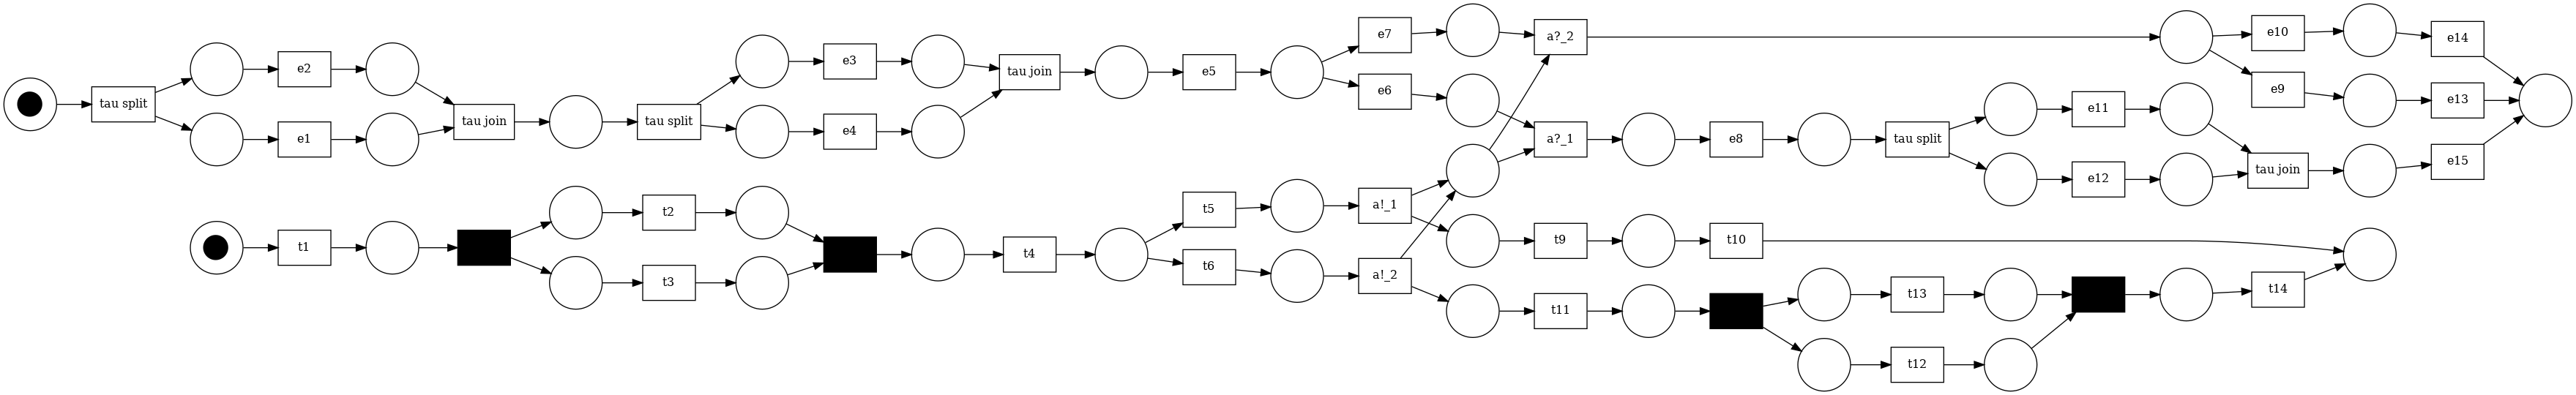

In [4]:
# compositionally mined process model
pn_coposition_mined, initial_marking, final_marking = pm4py.read_pnml(
    "/workspaces/university-petri-nets/backend/data_catalog/compositional_process_discovery_experiment_data/IP-1/IP-1_composition_mined.pnml",
)
pm4py.view_petri_net(pn_coposition_mined, initial_marking, final_marking, format="png")

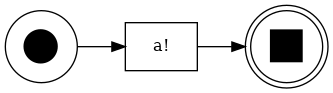

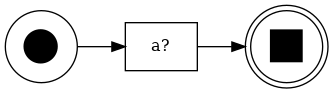

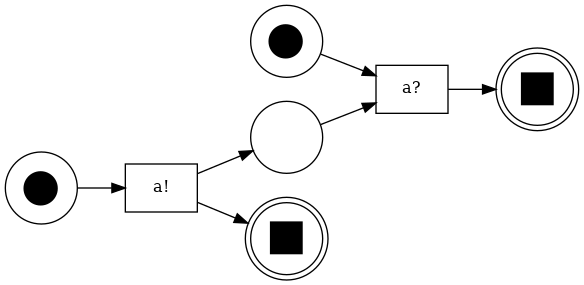

In [5]:
IP1 = INTERFACE_PATTERNS[0]
ip1_net_a1, ip1_initial_marking_a1, ip1_final_marking_a1 = IP1.get_net("A1")
pm4py.view_petri_net(ip1_net_a1, ip1_initial_marking_a1, ip1_final_marking_a1)

ip1_net_a2, ip1_initial_marking_a2, ip1_final_marking_a2 = IP1.get_net("A2")
pm4py.view_petri_net(ip1_net_a2, ip1_initial_marking_a2, ip1_final_marking_a2)

# merge the new
ip1_net = MergeNets.merge_nets(ip1_net_a1, ip1_net_a2)

# merge the markings
initial_marking = MergeNets.merge_markings(
    ip1_initial_marking_a1,
    ip1_initial_marking_a2,
)
final_marking = MergeNets.merge_markings(ip1_final_marking_a1, ip1_final_marking_a2)
pm4py.view_petri_net(ip1_net, initial_marking, final_marking)

#### 1. Directly Discover with the given input


parsing log, completed traces ::   0%|          | 0/5000 [00:00<?, ?it/s]

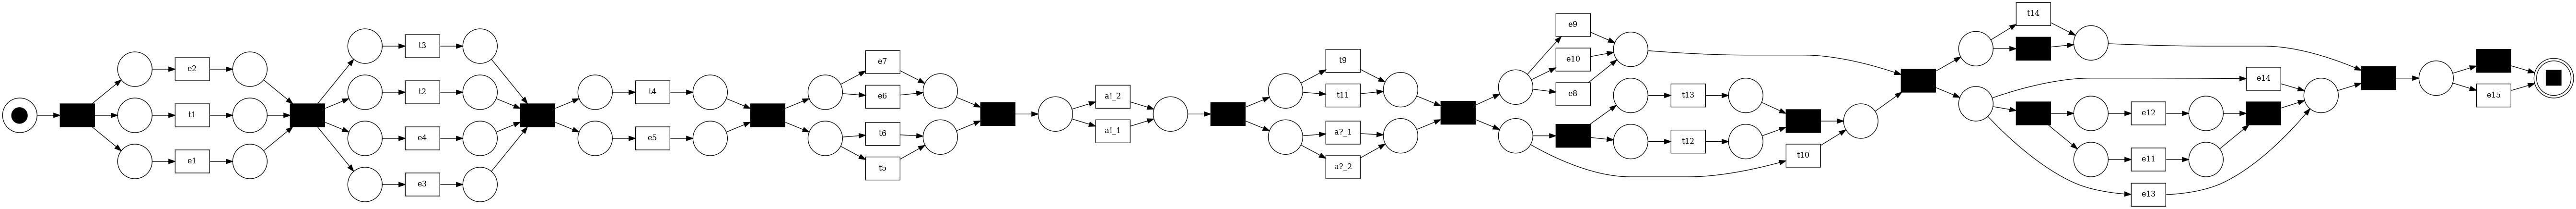

In [6]:
net, initial_marking, final_marking = discover(log_path, algorithm)
pm4py.view_petri_net(net, initial_marking, final_marking, format="png")

#### 2. Check Net is valid


In [7]:
assert is_valid(net, net) is True

#### 3. Check Nets are equal


In [8]:
assert is_isomorphic(net, net) is True

#### 4. Check is Refinement


refining at place p_52


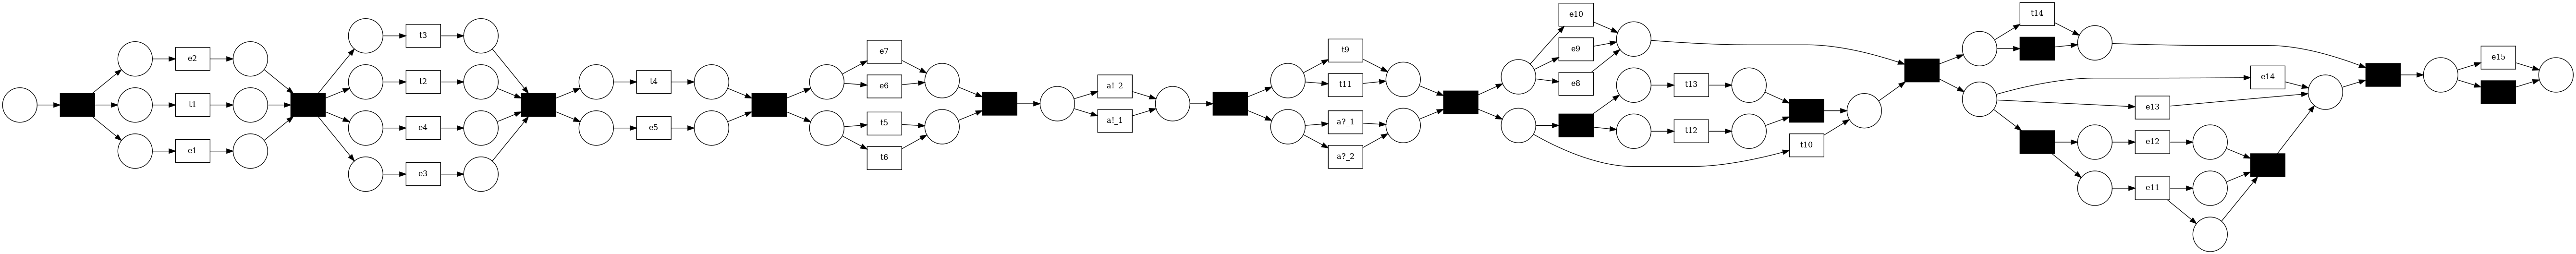

In [9]:
copy_refine_net = net.__deepcopy__()

places = list(copy_refine_net.places)
P1 = TRANSFORMATIONS[0]
new_net = P1.refine(places[2], copy_refine_net)

print(f"refining at place {places[2]}")
pm4py.view_petri_net(new_net)

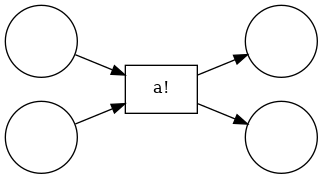

In [10]:
# Define the transformations to apply
transformations = TRANSFORMATIONS[0:1]  # Adjust this as needed

# Make a deep copy of the original net
copy_net = ip1_net_a1.__deepcopy__()

# Apply each transformation sequentially
for transformation in transformations:
    new_copy_net = (
        copy_net.__deepcopy__()
    )  # Make a new deep copy for each transformation
    for place in copy_net.places:
        new_copy_net = transformation.refine(
            place, new_copy_net,
        )
    copy_net = new_copy_net  # Update copy_net to the latest transformed net

pm4py.view_petri_net(copy_net, initial_marking, final_marking, format="png")

In [11]:
is_ref, path = is_refinement(net, net, TRANSFORMATIONS)
assert is_ref is True

2024-09-19 11:27:16,722 - INFO - The nets are initially isomorphic.


Processing Queue: 0it [00:00, ?it/s]2024-09-19 11:27:17,284 - INFO - The nets are isomorphic (P) after [(<class 'backend.compositional_algorithm.transformations.transformations.P1'>, p_50)].


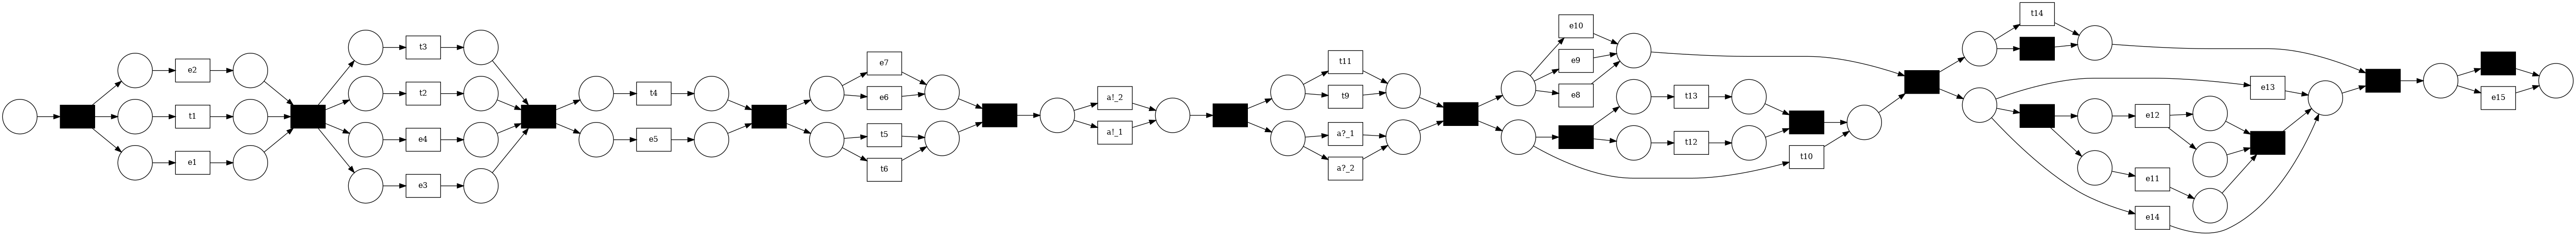

Processing Queue: 1it [00:00,  1.24it/s]

Output: True [(<class 'backend.compositional_algorithm.transformations.transformations.P1'>, p_50)]


In [12]:
assert not is_isomorphic(net, new_net)

is_ref, path = is_refinement(net, new_net,TRANSFORMATIONS)
print("Output:", is_ref, path)  # noqa: T201

Processing Queue: 0it [00:00, ?it/s]2024-09-19 11:27:17,999 - INFO - The nets are isomorphic (P) after [(<class 'backend.compositional_algorithm.transformations.transformations.P1'>, p_A1_1), (<class 'backend.compositional_algorithm.transformations.transformations.P1'>, p_A1_2)].


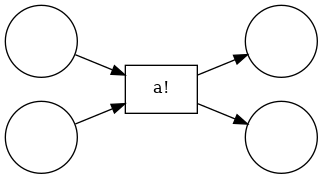

Processing Queue: 2it [00:00,  4.85it/s]

Output: True [(<class 'backend.compositional_algorithm.transformations.transformations.P1'>, p_A1_1), (<class 'backend.compositional_algorithm.transformations.transformations.P1'>, p_A1_2)]


: 

In [13]:
assert not is_isomorphic(net, copy_net)

is_ref, path = is_refinement(ip1_net_a1, copy_net, TRANSFORMATIONS)
print("Output:", is_ref, path)  # noqa: T201

In [14]:
is_ref, path = is_refinement(ip1_net_a1, net, TRANSFORMATIONS)
print(is_ref, path)

Processing Queue: 0it [00:00, ?it/s]

Processing Queue: 17572it [07:45, 42.36it/s]

#### 4. Check Algorithm


In [ ]:
discovered_net = compositional_discovery(
    input_log_path=log_path,
    algorithm=algorithm,
    interface_pattern=INTERFACE_PATTERNS[0],
    transformations=TRANSFORMATIONS,
)
pm4py.view_petri_net(discovered_net, format="png")